In [1]:
import pylab 
import numpy as np

47.916666666666664
[18, 20, 21, 23, 23, 25, 25, 26, 26, 27, 29, 31, 31, 31, 32, 33, 36, 36, 37, 38, 39, 41, 41, 41, 44, 44, 45, 46, 47, 48, 49, 49, 50, 51, 51, 51, 53, 54, 54, 54, 55, 55, 57, 59, 59, 60, 60, 62, 63, 65, 68, 69, 69, 70, 71, 74, 75, 85, 88, 91]
[1795, 1677, 1619, 1505, 1505, 1395, 1395, 1342, 1342, 1291, 1191, 1093, 1093, 1093, 1047, 1002, 870, 870, 828, 787, 747, 669, 669, 669, 561, 561, 527, 494, 462, 431, 401, 401, 373, 346, 346, 346, 298, 275, 275, 275, 255, 255, 219, 185, 185, 170, 170, 144, 132, 110, 80, 71, 71, 64, 58, 43, 39, 9, 3, 0]
2875 2875


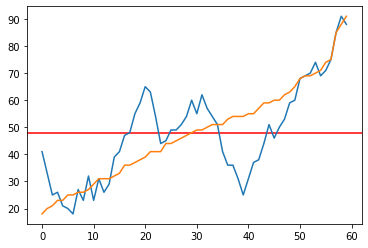

In [2]:
import random
random.seed(2) # same numbers each time while debugging
arr = []
start = 50
fullprice= 0
duration=60
for i in range(0, duration):
    start += random.randint(-10, 10)
    fullprice+= start
    arr.append(start)
#print(arr)
avgfullprice=fullprice/duration
print(avgfullprice)
pylab.axhline(avgfullprice, color='r')
# raw data: utilization over time
pylab.plot(arr)
# sorted: lowest to highest utilization
arr.sort()
print(arr)
pylab.plot(arr)
# calculate extra price up to that point
extra = [0]*(duration)
prev = 0
for i in range(duration-2, -1, -1):
    width=duration-1-i
    extra[i] = prev = prev + (arr[i+1]-arr[i])*width
#    print(i,width,arr[i+1],arr[i], extra[i])
nodiscount=extra[0]+arr[0]*duration
print(extra)
print(fullprice, nodiscount)

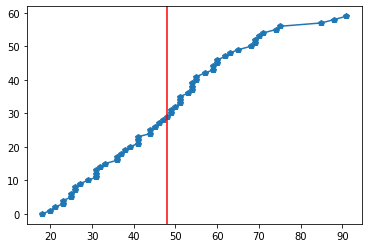

In [3]:
# plot swapped axis:
# for a given utilization, number of points already covered/belowe that utilization
data = {"x":[], "y":[]}
for i in range(0, duration):
    data["x"].append(arr[i])
    data["y"].append(i)
pylab.plot(data["x"], data["y"], '-p')
pylab.axvline(avgfullprice, color='r')

utilization varies from 18 to 91
18 0 44.31666666666667
20 1 43.95
21 2 43.78333333333333
23 3 43.483333333333334
25 5 43.25
26 7 43.166666666666664
27 9 43.11666666666667
29 10 43.05
31 11 43.016666666666666
32 14 43.05
33 15 43.1
36 16 43.3
37 18 43.4
38 19 43.516666666666666
39 20 43.65
41 21 43.95
44 24 44.55
45 26 44.78333333333333
46 27 45.03333333333333
47 28 45.3
48 29 45.583333333333336
49 30 45.88333333333333
50 32 46.21666666666667
51 33 46.56666666666667
53 36 47.36666666666667
54 37 47.78333333333333
55 40 48.25
57 42 49.25
59 43 50.28333333333333
60 45 50.833333333333336
62 47 52.0
63 48 52.6
65 49 53.833333333333336
68 50 55.733333333333334
69 51 56.38333333333333
70 53 57.06666666666667
71 54 57.766666666666666
74 55 59.916666666666664
75 56 60.65
85 57 68.15
88 58 70.45
91 59 72.8
Lowest avg cost is 43.016666666666666 for level 31 (full no discount was 47.916666666666664 )


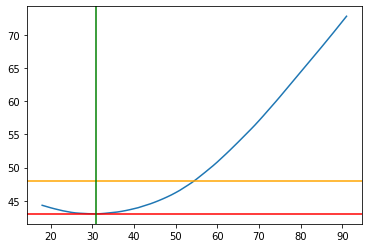

In [4]:
discountprice = .8

min=arr[0]
max=arr[duration-1]
print("utilization varies from", min, "to", max)

# Note: as we are graphing all the prices; we obviously wouldn't
# want to bisect and keep searching when we're actually just moving
# from one point to the next in data[]
# Next cell is doing incrementally

from bisect import bisect_left

def covered(level):
    i = bisect_left(data["x"], level)
    if i != duration and data["x"][i] == level:
        return data["y"][i]
    else:
        return -1

def price(level):
    reservedPrice = duration * discountprice * level
    right = covered(level)
    if right<0:
      return
    fullPrice = extra[right]
    cost = reservedPrice+fullPrice
    avgPrice = cost/duration
    #print(right, reservedPrice/duration,fullPrice, avgPrice)
    return right, avgPrice

  
data2 = {"x":[], "y":[]}

minPrice = -1
for i in range(min, max+1):
  p = price(i)
  if not p:
    continue
  lp = p[1]
  print(i, p[0], lp)
  data2["x"].append(i)
  data2["y"].append(lp)
  if minPrice == -1 or lp < minPrice:
    minPrice = lp
    level = i

pylab.plot(data2["x"], data2["y"])
pylab.axhline(minPrice, color='r')
pylab.axhline(avgfullprice, color='orange')
pylab.axvline(level, color='g')

print("Lowest avg cost is", minPrice, "for level", level, "(full no discount was", avgfullprice,")")


Lowest avg cost is 43.016666666666666 for level 31 (full no discount was 47.916666666666664 )


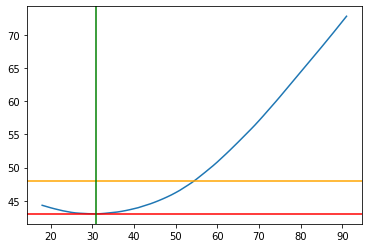

In [8]:
data3 = {"x":[], "y":[]}

minPrice = -1
i=0
for level in arr:
    reservedPrice = duration * discountprice * level
    restOfPrice = extra[i]
    i+=1
    lp = (reservedPrice + restOfPrice ) / duration
    data3["x"].append(level)
    data3["y"].append(lp)
    if minPrice == -1 or lp < minPrice:
      minPrice = lp
      minLevel = level

pylab.plot(data3["x"], data3["y"])
pylab.axhline(minPrice, color='r')
pylab.axhline(avgfullprice, color='orange')
pylab.axvline(minLevel, color='g')

print("Lowest avg cost is", minPrice, "for level", minLevel, "(full no discount was", avgfullprice,")")
